In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'd:\\Anupam_Technical\\Code\\ML\\KaggleChallenges\\TABULAR\\PREDICT_HORSE_HEALTH'

In [20]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [11]:
df_cols_dict = {col_name: col_type for col_name, col_type in zip(df_train.columns, df_train.dtypes)}
print(df_cols_dict)

{'id': dtype('int64'), 'surgery': dtype('O'), 'age': dtype('O'), 'hospital_number': dtype('int64'), 'rectal_temp': dtype('float64'), 'pulse': dtype('float64'), 'respiratory_rate': dtype('float64'), 'temp_of_extremities': dtype('O'), 'peripheral_pulse': dtype('O'), 'mucous_membrane': dtype('O'), 'capillary_refill_time': dtype('O'), 'pain': dtype('O'), 'peristalsis': dtype('O'), 'abdominal_distention': dtype('O'), 'nasogastric_tube': dtype('O'), 'nasogastric_reflux': dtype('O'), 'nasogastric_reflux_ph': dtype('float64'), 'rectal_exam_feces': dtype('O'), 'abdomen': dtype('O'), 'packed_cell_volume': dtype('float64'), 'total_protein': dtype('float64'), 'abdomo_appearance': dtype('O'), 'abdomo_protein': dtype('float64'), 'surgical_lesion': dtype('O'), 'lesion_1': dtype('int64'), 'lesion_2': dtype('int64'), 'lesion_3': dtype('int64'), 'cp_data': dtype('O'), 'outcome': dtype('O')}


In [4]:
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
df_train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [10]:
def get_null_stats(df):
    null_count = df.isnull().sum()
    col_null_counts = {col: null_cnt for col, null_cnt in null_count.iteritems() if null_cnt > 0}
    if len(col_null_counts) == 0:
        print(f"There are no columns with null values")
    else:
        print(col_null_counts)

print("For train data")
get_null_stats(df_train)


For train data
There are no columns with null values


In [13]:
# Check for imbalance in the target variable
df_train['outcome'].value_counts()

lived         574
died          410
euthanized    251
Name: outcome, dtype: int64

In [78]:
# Get the count of each column type
df_train.dtypes.value_counts()

object     17
float64     7
int64       5
dtype: int64

In [72]:
cols_float = df_train.select_dtypes(include=["float"]).columns.to_list()
cols_int = df_train.select_dtypes(include=["int64"]).columns.to_list()
cols_str = df_train.select_dtypes(include=["object"]).columns.to_list()

In [80]:
df_train[cols_int].describe()

,id,hospital_number,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,41110.000000,3112.000000,2209.000000


In [86]:
df_train[cols_str]

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
0,yes,adult,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious,yes,no,died
1,yes,adult,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious,yes,no,euthanized
2,yes,adult,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,None,distend_large,serosanguious,yes,no,lived
3,yes,adult,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy,yes,yes,lived
4,no,adult,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy,no,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,None,distend_large,serosanguious,yes,no,lived
1231,yes,adult,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious,yes,yes,died
1232,yes,young,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy,yes,yes,lived
1233,yes,adult,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy,yes,no,lived


In [24]:
df_train[cols_float].describe()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931
std,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195
min,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000
25%,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000
50%,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000
75%,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000
max,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000


In [25]:
df_test[cols_float].describe()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
count,824.000000,824.000000,824.00000,824.000000,824.000000,824.000000,824.000000
mean,38.244539,80.229369,30.71966,4.508495,49.063350,20.796238,3.336420
std,0.785234,29.164711,17.43191,1.883464,10.450138,26.413588,1.539235
min,36.000000,36.000000,9.00000,1.000000,23.000000,3.900000,0.100000
25%,37.800000,54.000000,18.00000,3.000000,43.000000,6.600000,2.000000
50%,38.200000,76.000000,28.00000,4.500000,48.000000,7.500000,3.300000
75%,38.600000,100.000000,36.00000,6.500000,55.000000,8.900000,4.300000
max,40.800000,184.000000,96.00000,7.500000,75.000000,89.000000,10.100000


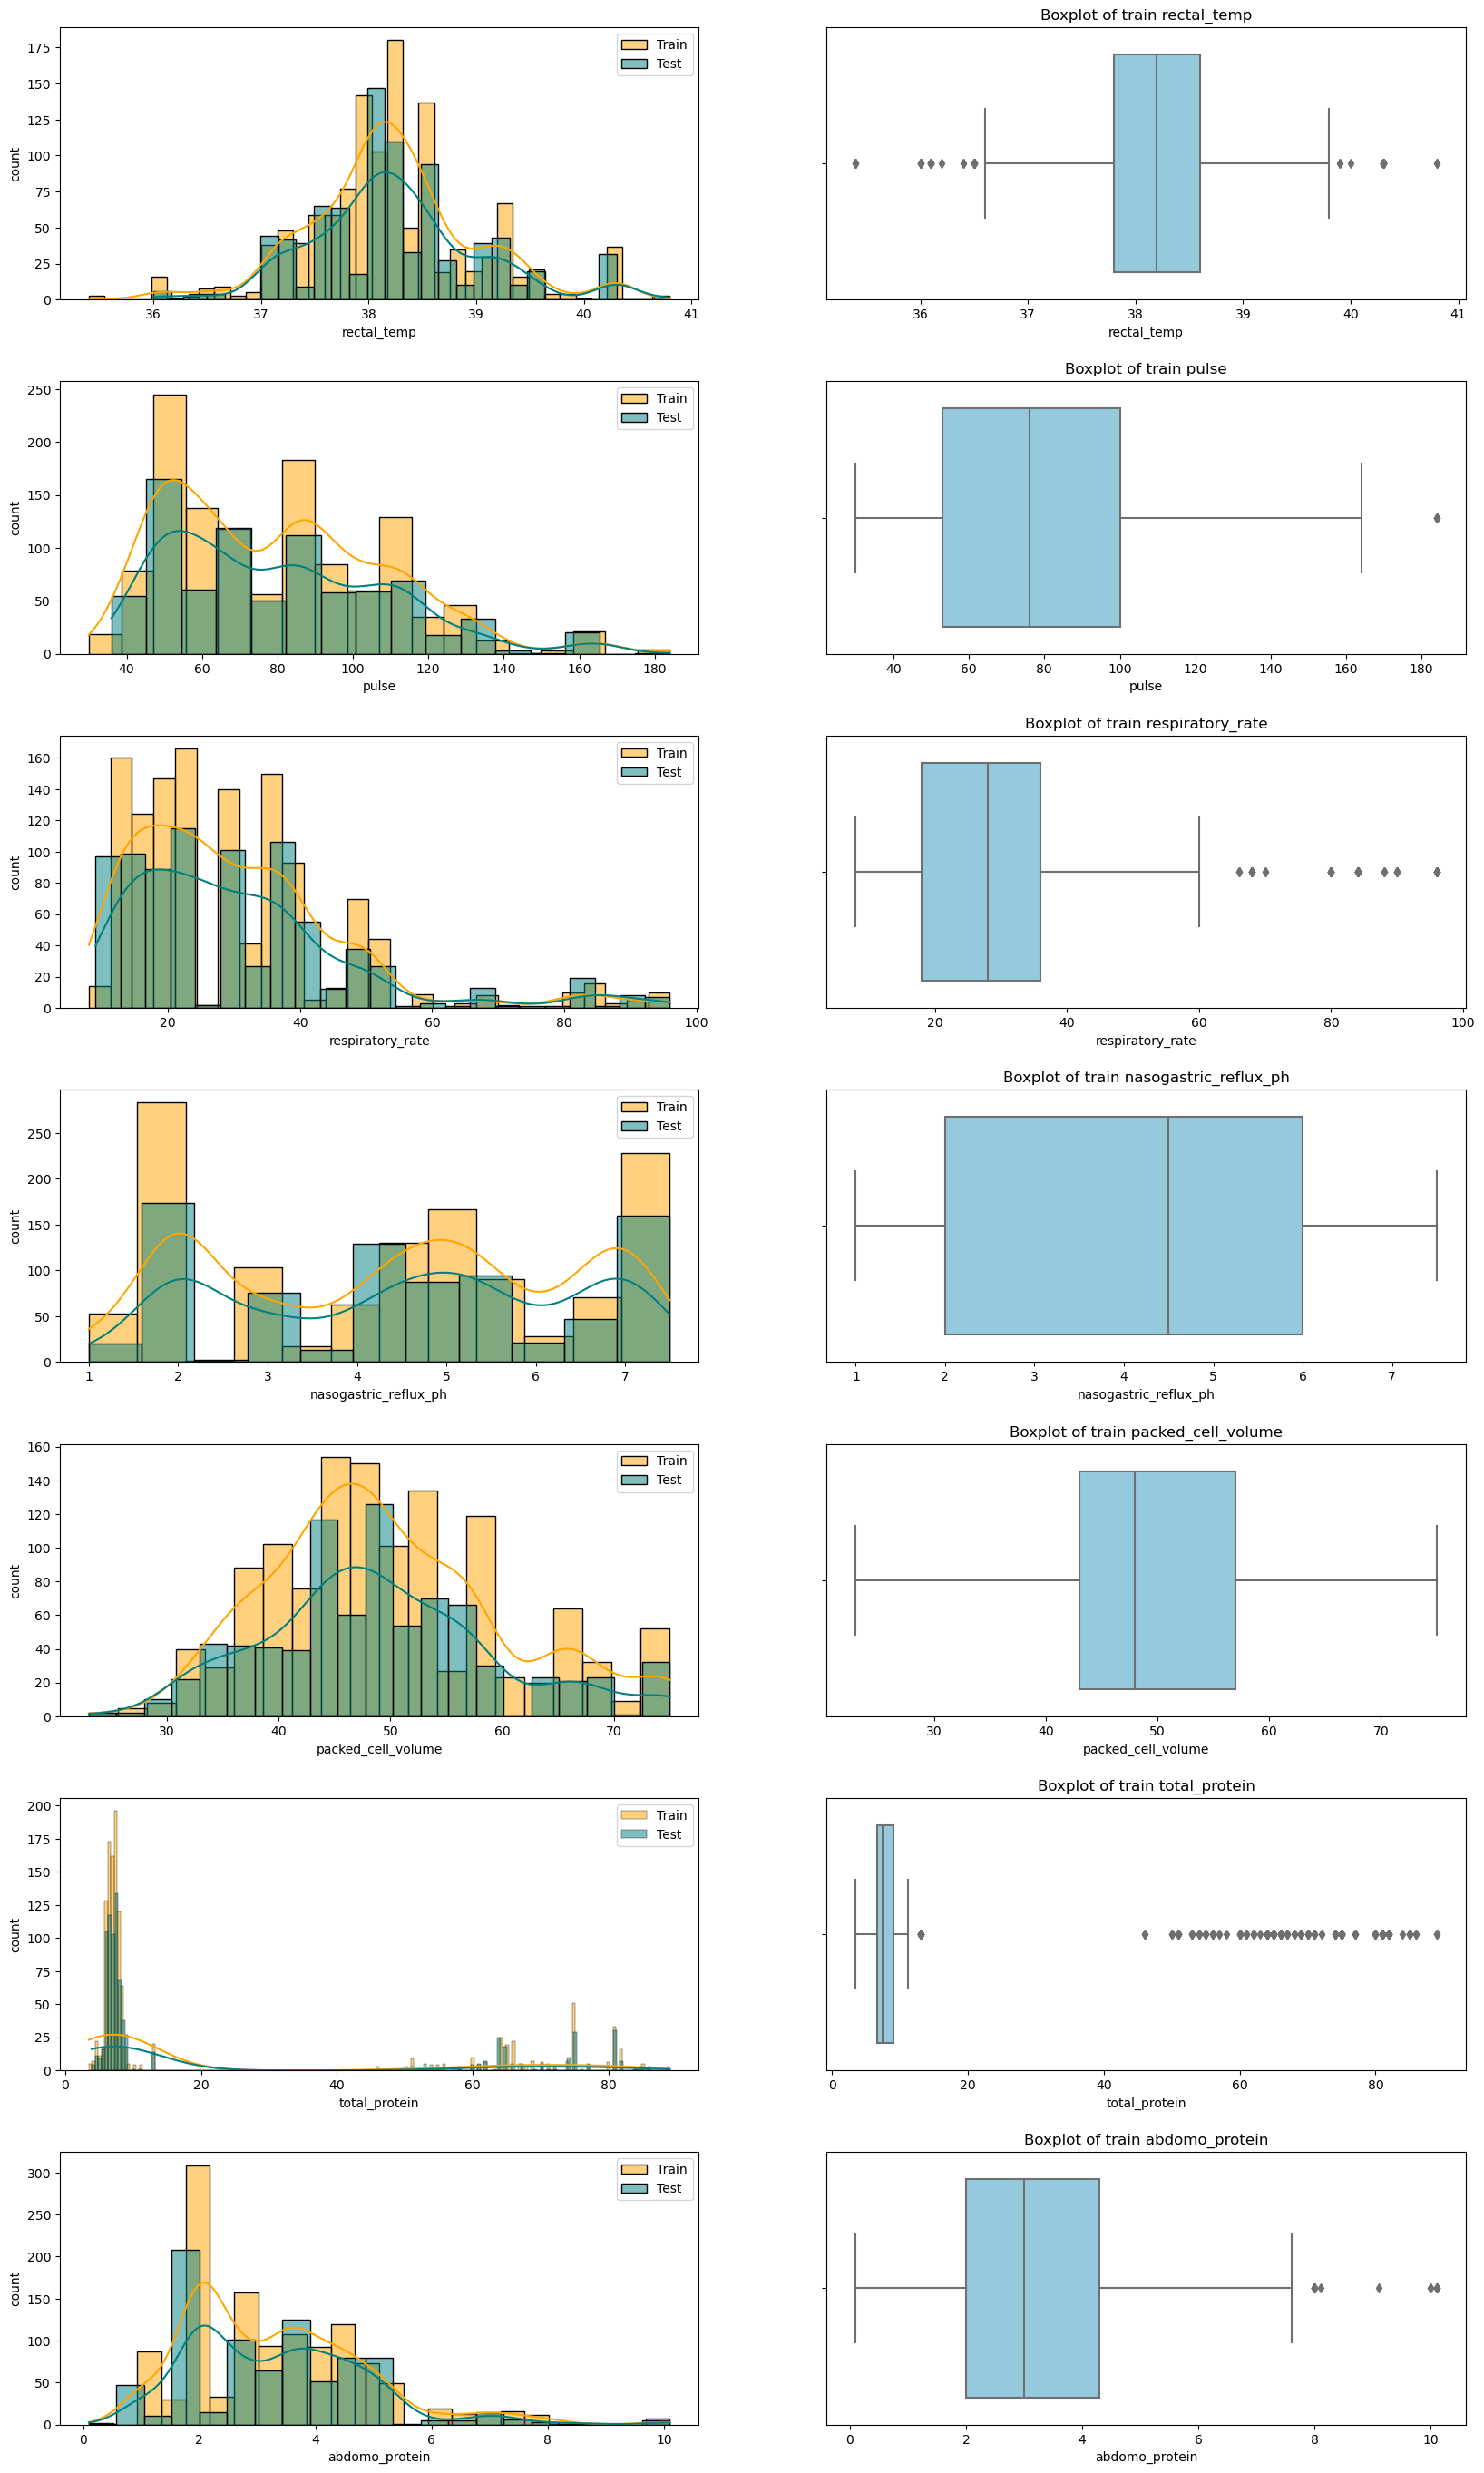

In [82]:
# plot the distribution of numerical features and look for any outliers. Also check if train and test data have roughly the same distribution
# for numerical features

import math 

n_rows = len(cols_float)
n_cols = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,35), dpi=100)
plt.subplots_adjust(hspace=0.3)
for row in range(n_rows):
    col = 0
    col_name = cols_float[row]
    sns.histplot(x=df_train[col_name], label="Train", kde=True, fill=True, color="orange", ax=axes[row, col])
    sns.histplot(x=df_test[col_name], label="Test", kde=True, fill=True, color="teal", ax=axes[row, col])        
    axes[row, 0].legend()
    axes[row, 0].set_ylabel("count")
    axes[row, 0].set_xlabel(col_name)
    col = 1
    sns.boxplot(x=df_train[col_name], orient='v', color='skyblue', ax=axes[row, col])
    axes[row, 1].set_ylabel("")
    axes[row, 1].set_xlabel(col_name)
    axes[row, 1].set_title(f'Boxplot of train {col_name}', fontsize=12)
        
plt.show()        

In [68]:
# For numerical features having outliers, find the row count with outliers. Use IQR method to find outliers

def get_outliers_iqr(col_name):
    Q1 = df_train[col_name].quantile(0.25)
    Q3 = df_train[col_name].quantile(0.75)
    IQR = Q3 - Q1    
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR    
    outlier_count = df_train[(df_train[col_name] < Q1 - 1.5 * IQR) | (df_train[col_name] > Q3 + 1.5 * IQR)].shape[0]
    # Create a DataFrame for the results
    result = pd.DataFrame({
        'col_name': [col_name],
        'Q1': [Q1],
        'Q3': [Q3],
        'IQR': [IQR],
        'min_val': [min_val],
        'max_val': [max_val],
        'outlier_count': [outlier_count]
    })    
    return result

# Create an empty DataFrame to store the results
df_float_outliers = pd.DataFrame(columns=['col_name', 'Q1', 'Q3', 'IQR', 'min_val', 'max_val', 'outlier_count'])
for col_name in cols_float:
    df_float_outliers = df_float_outliers.append(get_outliers_iqr(col_name))
df_float_outliers = df_float_outliers.reset_index(drop=True)
df_float_outliers

,col_name,Q1,Q3,IQR,min,max,outlier_count
0,rectal_temp,37.8,38.6,0.8,36.60,39.80,72
1,pulse,53.0,100.0,47.0,-17.50,170.50,4
2,respiratory_rate,18.0,36.0,18.0,-9.00,63.00,57
3,nasogastric_reflux_ph,2.0,6.0,4.0,-4.00,12.00,0
4,packed_cell_volume,43.0,57.0,14.0,22.00,78.00,0
5,total_protein,6.6,9.1,2.5,2.85,12.85,300
6,abdomo_protein,2.0,4.3,2.3,-1.45,7.75,19


In [83]:
# # For numerical features having outliers, find the row count with outliers. Use Z-score method to find outliers

# def get_outliers_zscore(col_name):
#     mean = df_train[col_name].mean()
#     std = df_train[col_name].std()
#     outlier_count = df_train[(df_train[col_name] < mean - 3 * std) | (df_train[col_name] > mean + 3 * std)].shape[0]
#     return outlier_count

# cols_float_outliers = {col_name: get_outliers_zscore(col_name) for col_name in cols_float}
# cols_float_outliers

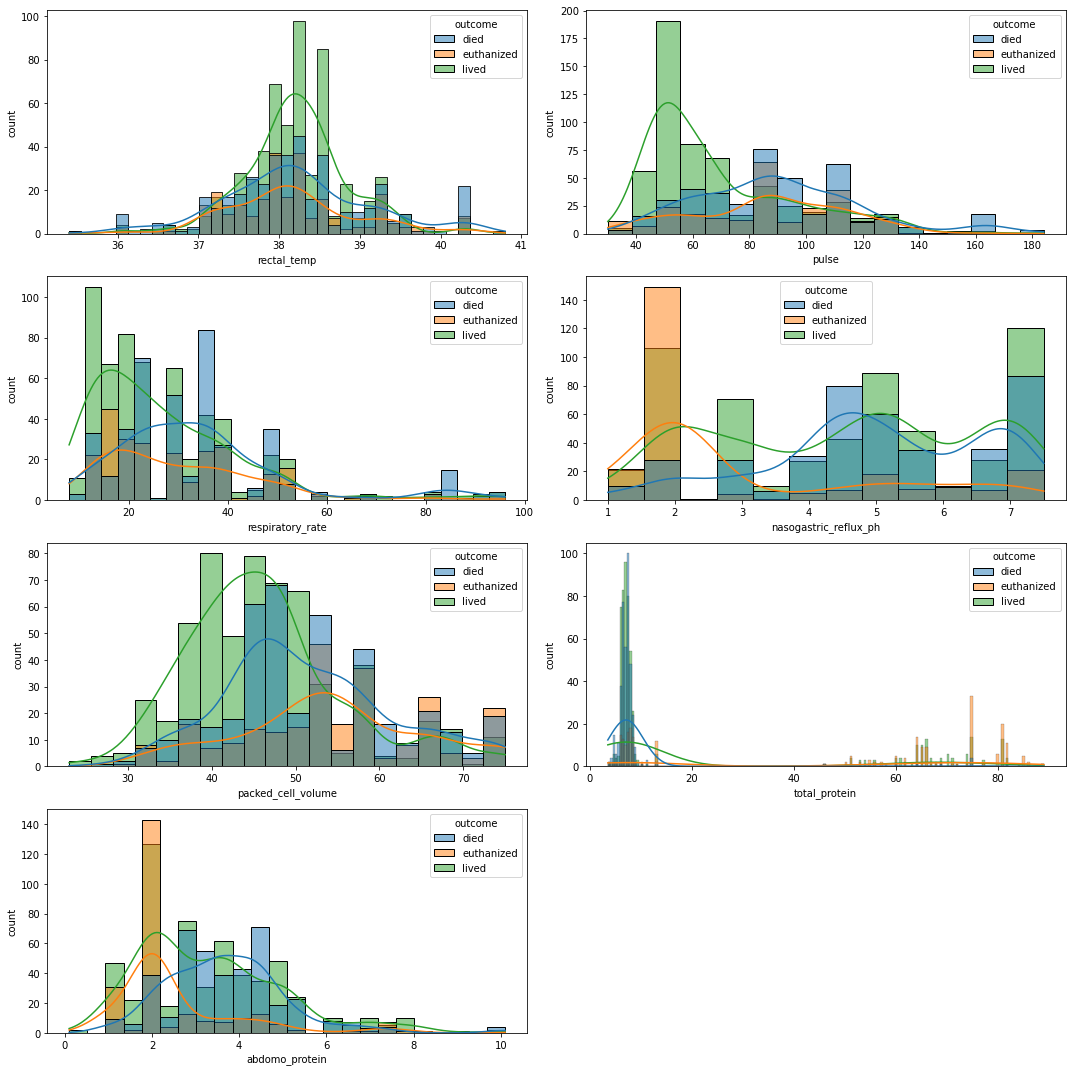

In [53]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.5)  # Adjust spacing between subplots

# Loop through numerical features and plot distribution based on target value
n_rows = math.ceil(len(cols_float) / 2)
n_cols = 2
for i, feature in enumerate(cols_float, start=1):
    axes = plt.subplot(n_rows, n_cols, i)  # Create a subplot
    sns.histplot(data=df_train, x=feature, hue="outcome", kde=True, palette="tab10", ax=axes)                        
    plt.xlabel(feature)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

### Correlation between numerical features and target
Calculate and visualize correlations between numerical features and between numerical features and target using correlation matrices and heatmaps. This can help identify potential relationships between health parameters.


In [91]:
df_train_numeric = df_train[cols_float + cols_int].drop(columns=["id"])
df_train_numeric.corr()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,hospital_number,lesion_1,lesion_2,lesion_3
rectal_temp,1.000000,0.176761,0.124377,0.115980,0.088986,-0.060842,0.043342,-0.002552,0.021711,-0.022823,-0.005220
pulse,0.176761,1.000000,0.395130,-0.010132,0.435102,0.004373,0.056391,0.118391,0.000037,0.021804,0.028273
respiratory_rate,0.124377,0.395130,1.000000,0.003854,0.188777,0.004018,0.004287,0.085008,0.020502,-0.010536,0.009663
nasogastric_reflux_ph,0.115980,-0.010132,0.003854,1.000000,-0.101066,-0.583299,0.433006,0.114354,0.052951,-0.029683,-0.024594
packed_cell_volume,0.088986,0.435102,0.188777,-0.101066,1.000000,0.176178,-0.059655,-0.018028,-0.083784,0.050659,0.051235
total_protein,-0.060842,0.004373,0.004018,-0.583299,0.176178,1.000000,-0.469784,-0.154746,-0.105598,0.044565,0.020635
abdomo_protein,0.043342,0.056391,0.004287,0.433006,-0.059655,-0.469784,1.000000,0.141800,0.050051,0.002571,-0.022588
hospital_number,-0.002552,0.118391,0.085008,0.114354,-0.018028,-0.154746,0.141800,1.000000,0.030844,0.022098,-0.012575
lesion_1,0.021711,0.000037,0.020502,0.052951,-0.083784,-0.105598,0.050051,0.030844,1.000000,-0.007595,0.002761
lesion_2,-0.022823,0.021804,-0.010536,-0.029683,0.050659,0.044565,0.002571,0.022098,-0.007595,1.000000,0.644054


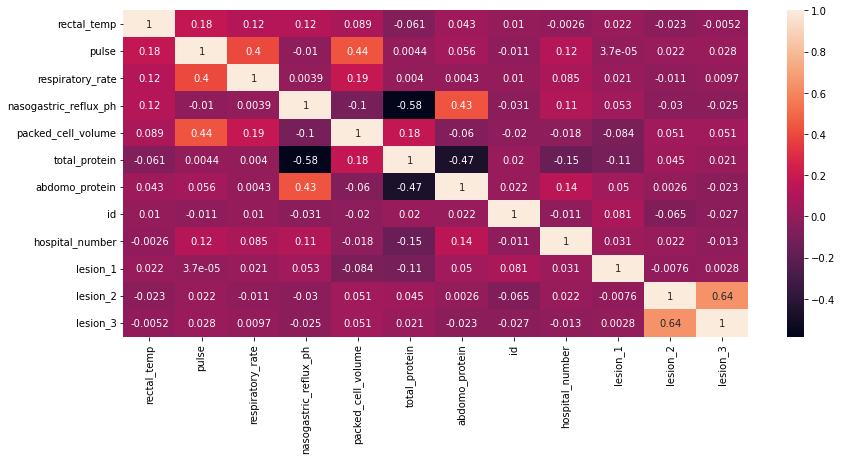

In [90]:
fig, ax = plt.subplots(figsize=(14, 6))
corr = df_train_numeric.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, ax = ax)